In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [3]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image.flags.writeable = False                  
    results = model.process(image)                 
    image.flags.writeable = True                   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [5]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [87]:
cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.9, min_tracking_confidence=0.9) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)
        draw_styled_landmarks(image, results)
        img=cv2.flip(image,1)
        cv2.imshow('OpenCV Feed', img)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [7]:
cap.release()
cv2.destroyAllWindows()

In [8]:
draw_styled_landmarks(frame, results)

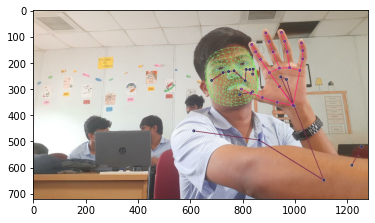

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [10]:
len(results.left_hand_landmarks.landmark)

21

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [13]:
result_test = extract_keypoints(results)

In [14]:
np.save('0',result_test)

In [15]:
# Path for exported data, numpy arrays
directory=input('enter ')
if not os.path.exists(directory):
    os.makedirs(directory)
x='**'
temp=True
while(temp):
    subdir=input('enter ')
    if subdir==x:
        temp=False
    else:
        path=directory+'/'+subdir+'/'
        try:
            os.makedirs(path)
        except:
            print('already exists')

enter Data
enter **


In [42]:

DATA_PATH=os.path.join(directory)
#actions=[]
actions1=os.listdir(directory)
actions=np.array(actions1)
#actions = os.listdir(directory)
# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
#start_folder = 10

In [43]:
print(actions)

['female' 'hello' 'iloveyou' 'indian' 'thanks']


In [44]:
for action in actions: 
    #dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(0,no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [45]:
from cv2 import imshow
cap= cv2.VideoCapture(1)
#Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.9, min_tracking_confidence=0.9) as holistic:
    for action in actions:
    #Loop through sequences aka videos
        for sequence in range(no_sequences):
        #Loop through video length aka sequence Length
            for frame_num in range( sequence_length):
                #print(frame_num)
            # Read feed
                ret, frame = cap.read()
#Make detections
                image, results = mediapipe_detection(frame, holistic)
                #print(results)
#Draw Landmarks I
                draw_styled_landmarks(image, results)
#NEW Apply wait logic
                if frame_num == 0:
                    #print(frame_num)
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'collecting frames for {} Video Number {}' .format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}' .format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#Show to screen
                    cv2.imshow('OpenCV Feed', image)
#NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                print(npy_path)
                np.save(npy_path, keypoints)
# Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
cap.release()
cv2.destroyAllWindows()

Data\female\0\0
Data\female\0\1
Data\female\0\2
Data\female\0\3
Data\female\0\4
Data\female\0\5
Data\female\0\6
Data\female\0\7
Data\female\0\8
Data\female\0\9
Data\female\0\10
Data\female\0\11
Data\female\0\12
Data\female\0\13
Data\female\0\14
Data\female\0\15
Data\female\0\16
Data\female\0\17
Data\female\0\18
Data\female\0\19
Data\female\0\20
Data\female\0\21
Data\female\0\22
Data\female\0\23
Data\female\0\24
Data\female\0\25
Data\female\0\26
Data\female\0\27
Data\female\0\28
Data\female\0\29
Data\female\1\0
Data\female\1\1
Data\female\1\2
Data\female\1\3
Data\female\1\4
Data\female\1\5
Data\female\1\6
Data\female\1\7
Data\female\1\8
Data\female\1\9
Data\female\1\10
Data\female\1\11
Data\female\1\12
Data\female\1\13
Data\female\1\14
Data\female\1\15
Data\female\1\16
Data\female\1\17
Data\female\1\18
Data\female\1\19
Data\female\1\20
Data\female\1\21
Data\female\1\22
Data\female\1\23
Data\female\1\24
Data\female\1\25
Data\female\1\26
Data\female\1\27
Data\female\1\28
Data\female\1\29


Data\female\16\1
Data\female\16\2
Data\female\16\3
Data\female\16\4
Data\female\16\5
Data\female\16\6
Data\female\16\7
Data\female\16\8
Data\female\16\9
Data\female\16\10
Data\female\16\11
Data\female\16\12
Data\female\16\13
Data\female\16\14
Data\female\16\15
Data\female\16\16
Data\female\16\17
Data\female\16\18
Data\female\16\19
Data\female\16\20
Data\female\16\21
Data\female\16\22
Data\female\16\23
Data\female\16\24
Data\female\16\25
Data\female\16\26
Data\female\16\27
Data\female\16\28
Data\female\16\29
Data\female\17\0
Data\female\17\1
Data\female\17\2
Data\female\17\3
Data\female\17\4
Data\female\17\5
Data\female\17\6
Data\female\17\7
Data\female\17\8
Data\female\17\9
Data\female\17\10
Data\female\17\11
Data\female\17\12
Data\female\17\13
Data\female\17\14
Data\female\17\15
Data\female\17\16
Data\female\17\17
Data\female\17\18
Data\female\17\19
Data\female\17\20
Data\female\17\21
Data\female\17\22
Data\female\17\23
Data\female\17\24
Data\female\17\25
Data\female\17\26
Data\female

Data\hello\1\21
Data\hello\1\22
Data\hello\1\23
Data\hello\1\24
Data\hello\1\25
Data\hello\1\26
Data\hello\1\27
Data\hello\1\28
Data\hello\1\29
Data\hello\2\0
Data\hello\2\1
Data\hello\2\2
Data\hello\2\3
Data\hello\2\4
Data\hello\2\5
Data\hello\2\6
Data\hello\2\7
Data\hello\2\8
Data\hello\2\9
Data\hello\2\10
Data\hello\2\11
Data\hello\2\12
Data\hello\2\13
Data\hello\2\14
Data\hello\2\15
Data\hello\2\16
Data\hello\2\17
Data\hello\2\18
Data\hello\2\19
Data\hello\2\20
Data\hello\2\21
Data\hello\2\22
Data\hello\2\23
Data\hello\2\24
Data\hello\2\25
Data\hello\2\26
Data\hello\2\27
Data\hello\2\28
Data\hello\2\29
Data\hello\3\0
Data\hello\3\1
Data\hello\3\2
Data\hello\3\3
Data\hello\3\4
Data\hello\3\5
Data\hello\3\6
Data\hello\3\7
Data\hello\3\8
Data\hello\3\9
Data\hello\3\10
Data\hello\3\11
Data\hello\3\12
Data\hello\3\13
Data\hello\3\14
Data\hello\3\15
Data\hello\3\16
Data\hello\3\17
Data\hello\3\18
Data\hello\3\19
Data\hello\3\20
Data\hello\3\21
Data\hello\3\22
Data\hello\3\23
Data\hello\3

Data\hello\18\18
Data\hello\18\19
Data\hello\18\20
Data\hello\18\21
Data\hello\18\22
Data\hello\18\23
Data\hello\18\24
Data\hello\18\25
Data\hello\18\26
Data\hello\18\27
Data\hello\18\28
Data\hello\18\29
Data\hello\19\0
Data\hello\19\1
Data\hello\19\2
Data\hello\19\3
Data\hello\19\4
Data\hello\19\5
Data\hello\19\6
Data\hello\19\7
Data\hello\19\8
Data\hello\19\9
Data\hello\19\10
Data\hello\19\11
Data\hello\19\12
Data\hello\19\13
Data\hello\19\14
Data\hello\19\15
Data\hello\19\16
Data\hello\19\17
Data\hello\19\18
Data\hello\19\19
Data\hello\19\20
Data\hello\19\21
Data\hello\19\22
Data\hello\19\23
Data\hello\19\24
Data\hello\19\25
Data\hello\19\26
Data\hello\19\27
Data\hello\19\28
Data\hello\19\29
Data\hello\20\0
Data\hello\20\1
Data\hello\20\2
Data\hello\20\3
Data\hello\20\4
Data\hello\20\5
Data\hello\20\6
Data\hello\20\7
Data\hello\20\8
Data\hello\20\9
Data\hello\20\10
Data\hello\20\11
Data\hello\20\12
Data\hello\20\13
Data\hello\20\14
Data\hello\20\15
Data\hello\20\16
Data\hello\20\17


Data\iloveyou\4\14
Data\iloveyou\4\15
Data\iloveyou\4\16
Data\iloveyou\4\17
Data\iloveyou\4\18
Data\iloveyou\4\19
Data\iloveyou\4\20
Data\iloveyou\4\21
Data\iloveyou\4\22
Data\iloveyou\4\23
Data\iloveyou\4\24
Data\iloveyou\4\25
Data\iloveyou\4\26
Data\iloveyou\4\27
Data\iloveyou\4\28
Data\iloveyou\4\29
Data\iloveyou\5\0
Data\iloveyou\5\1
Data\iloveyou\5\2
Data\iloveyou\5\3
Data\iloveyou\5\4
Data\iloveyou\5\5
Data\iloveyou\5\6
Data\iloveyou\5\7
Data\iloveyou\5\8
Data\iloveyou\5\9
Data\iloveyou\5\10
Data\iloveyou\5\11
Data\iloveyou\5\12
Data\iloveyou\5\13
Data\iloveyou\5\14
Data\iloveyou\5\15
Data\iloveyou\5\16
Data\iloveyou\5\17
Data\iloveyou\5\18
Data\iloveyou\5\19
Data\iloveyou\5\20
Data\iloveyou\5\21
Data\iloveyou\5\22
Data\iloveyou\5\23
Data\iloveyou\5\24
Data\iloveyou\5\25
Data\iloveyou\5\26
Data\iloveyou\5\27
Data\iloveyou\5\28
Data\iloveyou\5\29
Data\iloveyou\6\0
Data\iloveyou\6\1
Data\iloveyou\6\2
Data\iloveyou\6\3
Data\iloveyou\6\4
Data\iloveyou\6\5
Data\iloveyou\6\6
Data\ilove

Data\iloveyou\18\19
Data\iloveyou\18\20
Data\iloveyou\18\21
Data\iloveyou\18\22
Data\iloveyou\18\23
Data\iloveyou\18\24
Data\iloveyou\18\25
Data\iloveyou\18\26
Data\iloveyou\18\27
Data\iloveyou\18\28
Data\iloveyou\18\29
Data\iloveyou\19\0
Data\iloveyou\19\1
Data\iloveyou\19\2
Data\iloveyou\19\3
Data\iloveyou\19\4
Data\iloveyou\19\5
Data\iloveyou\19\6
Data\iloveyou\19\7
Data\iloveyou\19\8
Data\iloveyou\19\9
Data\iloveyou\19\10
Data\iloveyou\19\11
Data\iloveyou\19\12
Data\iloveyou\19\13
Data\iloveyou\19\14
Data\iloveyou\19\15
Data\iloveyou\19\16
Data\iloveyou\19\17
Data\iloveyou\19\18
Data\iloveyou\19\19
Data\iloveyou\19\20
Data\iloveyou\19\21
Data\iloveyou\19\22
Data\iloveyou\19\23
Data\iloveyou\19\24
Data\iloveyou\19\25
Data\iloveyou\19\26
Data\iloveyou\19\27
Data\iloveyou\19\28
Data\iloveyou\19\29
Data\iloveyou\20\0
Data\iloveyou\20\1
Data\iloveyou\20\2
Data\iloveyou\20\3
Data\iloveyou\20\4
Data\iloveyou\20\5
Data\iloveyou\20\6
Data\iloveyou\20\7
Data\iloveyou\20\8
Data\iloveyou\20\9


Data\indian\2\29
Data\indian\3\0
Data\indian\3\1
Data\indian\3\2
Data\indian\3\3
Data\indian\3\4
Data\indian\3\5
Data\indian\3\6
Data\indian\3\7
Data\indian\3\8
Data\indian\3\9
Data\indian\3\10
Data\indian\3\11
Data\indian\3\12
Data\indian\3\13
Data\indian\3\14
Data\indian\3\15
Data\indian\3\16
Data\indian\3\17
Data\indian\3\18
Data\indian\3\19
Data\indian\3\20
Data\indian\3\21
Data\indian\3\22
Data\indian\3\23
Data\indian\3\24
Data\indian\3\25
Data\indian\3\26
Data\indian\3\27
Data\indian\3\28
Data\indian\3\29
Data\indian\4\0
Data\indian\4\1
Data\indian\4\2
Data\indian\4\3
Data\indian\4\4
Data\indian\4\5
Data\indian\4\6
Data\indian\4\7
Data\indian\4\8
Data\indian\4\9
Data\indian\4\10
Data\indian\4\11
Data\indian\4\12
Data\indian\4\13
Data\indian\4\14
Data\indian\4\15
Data\indian\4\16
Data\indian\4\17
Data\indian\4\18
Data\indian\4\19
Data\indian\4\20
Data\indian\4\21
Data\indian\4\22
Data\indian\4\23
Data\indian\4\24
Data\indian\4\25
Data\indian\4\26
Data\indian\4\27
Data\indian\4\28


Data\indian\18\25
Data\indian\18\26
Data\indian\18\27
Data\indian\18\28
Data\indian\18\29
Data\indian\19\0
Data\indian\19\1
Data\indian\19\2
Data\indian\19\3
Data\indian\19\4
Data\indian\19\5
Data\indian\19\6
Data\indian\19\7
Data\indian\19\8
Data\indian\19\9
Data\indian\19\10
Data\indian\19\11
Data\indian\19\12
Data\indian\19\13
Data\indian\19\14
Data\indian\19\15
Data\indian\19\16
Data\indian\19\17
Data\indian\19\18
Data\indian\19\19
Data\indian\19\20
Data\indian\19\21
Data\indian\19\22
Data\indian\19\23
Data\indian\19\24
Data\indian\19\25
Data\indian\19\26
Data\indian\19\27
Data\indian\19\28
Data\indian\19\29
Data\indian\20\0
Data\indian\20\1
Data\indian\20\2
Data\indian\20\3
Data\indian\20\4
Data\indian\20\5
Data\indian\20\6
Data\indian\20\7
Data\indian\20\8
Data\indian\20\9
Data\indian\20\10
Data\indian\20\11
Data\indian\20\12
Data\indian\20\13
Data\indian\20\14
Data\indian\20\15
Data\indian\20\16
Data\indian\20\17
Data\indian\20\18
Data\indian\20\19
Data\indian\20\20
Data\indian\

Data\thanks\4\17
Data\thanks\4\18
Data\thanks\4\19
Data\thanks\4\20
Data\thanks\4\21
Data\thanks\4\22
Data\thanks\4\23
Data\thanks\4\24
Data\thanks\4\25
Data\thanks\4\26
Data\thanks\4\27
Data\thanks\4\28
Data\thanks\4\29
Data\thanks\5\0
Data\thanks\5\1
Data\thanks\5\2
Data\thanks\5\3
Data\thanks\5\4
Data\thanks\5\5
Data\thanks\5\6
Data\thanks\5\7
Data\thanks\5\8
Data\thanks\5\9
Data\thanks\5\10
Data\thanks\5\11
Data\thanks\5\12
Data\thanks\5\13
Data\thanks\5\14
Data\thanks\5\15
Data\thanks\5\16
Data\thanks\5\17
Data\thanks\5\18
Data\thanks\5\19
Data\thanks\5\20
Data\thanks\5\21
Data\thanks\5\22
Data\thanks\5\23
Data\thanks\5\24
Data\thanks\5\25
Data\thanks\5\26
Data\thanks\5\27
Data\thanks\5\28
Data\thanks\5\29
Data\thanks\6\0
Data\thanks\6\1
Data\thanks\6\2
Data\thanks\6\3
Data\thanks\6\4
Data\thanks\6\5
Data\thanks\6\6
Data\thanks\6\7
Data\thanks\6\8
Data\thanks\6\9
Data\thanks\6\10
Data\thanks\6\11
Data\thanks\6\12
Data\thanks\6\13
Data\thanks\6\14
Data\thanks\6\15
Data\thanks\6\16


Data\thanks\20\11
Data\thanks\20\12
Data\thanks\20\13
Data\thanks\20\14
Data\thanks\20\15
Data\thanks\20\16
Data\thanks\20\17
Data\thanks\20\18
Data\thanks\20\19
Data\thanks\20\20
Data\thanks\20\21
Data\thanks\20\22
Data\thanks\20\23
Data\thanks\20\24
Data\thanks\20\25
Data\thanks\20\26
Data\thanks\20\27
Data\thanks\20\28
Data\thanks\20\29
Data\thanks\21\0
Data\thanks\21\1
Data\thanks\21\2
Data\thanks\21\3
Data\thanks\21\4
Data\thanks\21\5
Data\thanks\21\6
Data\thanks\21\7
Data\thanks\21\8
Data\thanks\21\9
Data\thanks\21\10
Data\thanks\21\11
Data\thanks\21\12
Data\thanks\21\13
Data\thanks\21\14
Data\thanks\21\15
Data\thanks\21\16
Data\thanks\21\17
Data\thanks\21\18
Data\thanks\21\19
Data\thanks\21\20
Data\thanks\21\21
Data\thanks\21\22
Data\thanks\21\23
Data\thanks\21\24
Data\thanks\21\25
Data\thanks\21\26
Data\thanks\21\27
Data\thanks\21\28
Data\thanks\21\29
Data\thanks\22\0
Data\thanks\22\1
Data\thanks\22\2
Data\thanks\22\3
Data\thanks\22\4
Data\thanks\22\5
Data\thanks\22\6
Data\than

In [91]:
cap.release(0)
cv2.destroyAllWindows()

SystemError: <method 'release' of 'cv2.VideoCapture' objects> returned NULL without setting an error

In [46]:
label_map = {label:num for num, label in enumerate(actions)}

In [47]:
label_map

{'female': 0, 'hello': 1, 'iloveyou': 2, 'indian': 3, 'thanks': 4}

In [48]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [49]:
X = np.array(sequences)

In [50]:
y = to_categorical(labels).astype(int)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [52]:
y_test.shape

(8, 5)

In [53]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [54]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [55]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [56]:
model.fit(X_train, y_train, epochs=200, callbacks=[tb_callback])


Epoch 1/200
5/5 [==============================] - 25s 3s/step - loss: 2.8717 - categorical_accuracy: 0.2254
Epoch 2/200
5/5 [==============================] - 2s 321ms/step - loss: 3.0179 - categorical_accuracy: 0.2394
Epoch 3/200
5/5 [==============================] - 2s 320ms/step - loss: 2.2551 - categorical_accuracy: 0.2394
Epoch 4/200
5/5 [==============================] - 2s 320ms/step - loss: 2.0357 - categorical_accuracy: 0.2042
Epoch 5/200
5/5 [==============================] - 2s 328ms/step - loss: 1.4177 - categorical_accuracy: 0.2887
Epoch 6/200
5/5 [==============================] - 2s 314ms/step - loss: 1.2779 - categorical_accuracy: 0.3944
Epoch 7/200
5/5 [==============================] - 2s 348ms/step - loss: 1.2208 - categorical_accuracy: 0.3944
Epoch 8/200
5/5 [==============================] - 2s 415ms/step - loss: 1.1512 - categorical_accuracy: 0.4014
Epoch 9/200
5/5 [==============================] - 2s 378ms/step - loss: 1.1168 - categorical_accuracy: 0.3944
Epo

5/5 [==============================] - 2s 318ms/step - loss: 1.4513 - categorical_accuracy: 0.1972
Epoch 75/200
5/5 [==============================] - 2s 425ms/step - loss: 1.3986 - categorical_accuracy: 0.1972
Epoch 76/200
5/5 [==============================] - 2s 389ms/step - loss: 1.3578 - categorical_accuracy: 0.2042
Epoch 77/200
5/5 [==============================] - 2s 408ms/step - loss: 1.3160 - categorical_accuracy: 0.2465
Epoch 78/200
5/5 [==============================] - 2s 361ms/step - loss: 1.2314 - categorical_accuracy: 0.2887
Epoch 79/200
5/5 [==============================] - 2s 341ms/step - loss: 1.1592 - categorical_accuracy: 0.4085
Epoch 80/200
5/5 [==============================] - 2s 319ms/step - loss: 1.3276 - categorical_accuracy: 0.3662
Epoch 81/200
5/5 [==============================] - 2s 316ms/step - loss: 1.5335 - categorical_accuracy: 0.2042
Epoch 82/200
5/5 [==============================] - 2s 338ms/step - loss: 1.4952 - categorical_accuracy: 0.2113
Epoch

5/5 [==============================] - 2s 361ms/step - loss: 1.4875 - categorical_accuracy: 0.3944
Epoch 147/200
5/5 [==============================] - 2s 377ms/step - loss: 1.3120 - categorical_accuracy: 0.4155
Epoch 148/200
5/5 [==============================] - 2s 360ms/step - loss: 1.2134 - categorical_accuracy: 0.4014
Epoch 149/200
5/5 [==============================] - 2s 376ms/step - loss: 1.1910 - categorical_accuracy: 0.4366
Epoch 150/200
5/5 [==============================] - 2s 385ms/step - loss: 1.1862 - categorical_accuracy: 0.4014
Epoch 151/200
5/5 [==============================] - 2s 363ms/step - loss: 1.1754 - categorical_accuracy: 0.4014
Epoch 152/200
5/5 [==============================] - 2s 463ms/step - loss: 1.1603 - categorical_accuracy: 0.3944
Epoch 153/200
5/5 [==============================] - 2s 440ms/step - loss: 23.8431 - categorical_accuracy: 0.2746
Epoch 154/200
5/5 [==============================] - 2s 398ms/step - loss: 1.6739 - categorical_accuracy: 0.1

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 165       
Total params: 596,741
Trainable params: 596,741
Non-trainable params: 0
________________________________________________

In [132]:
resz = model.predict(X_test)

In [133]:
actions[np.argmax(res[1])]

'female'

In [134]:
actions[np.argmax(y_test[7])]

'thanks'

In [135]:
model.save('action.h5')

In [136]:
model.load_weights('action.h5')

In [137]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [138]:
yhat = model.predict(X_test)

In [139]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [140]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[7, 0],
        [0, 1]],

       [[5, 2],
        [0, 1]],

       [[6, 0],
        [2, 0]],

       [[6, 0],
        [0, 2]],

       [[6, 0],
        [0, 2]]], dtype=int64)

In [141]:
accuracy_score(ytrue, yhat)

0.75

In [143]:
from scipy import stats

In [144]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [172]:
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.9, min_tracking_confidence=0.9) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        frame=cv2.flip(frame,1)
        image, results = mediapipe_detection(frame, holistic)
        #print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.insert(0,keypoints)
        #sequence.append(keypoints)
        sequence = sequence[:30]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            op=(actions[np.argmax(res)])
            print(op)
            predictions.append(np.argmax(res))
            break
        #3. Viz logic
            #if np.unique(predictions[-10:])[0]==np.argmax(res): 
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

female


In [159]:
from gtts import gTTS
import os
audio = gTTS(text=op, lang="en", slow=False)
audio.save("example.mp3")
os.system("example.mp3")

0

In [93]:
cap.release()
cv2.destroyAllWindows()